# Hallo
## Hallo


In [8]:
import src.knn as knn
%matplotlib inline
import src.pca as pca
import src.pickle_operations as pickle_io
import matplotlib.pyplot as plt
import src.plot as plot
from src import KNN_sklearn as knn_sklearn
from src import meta_digit_operations as meta_digit
from src import knn_clustering
import numpy as np
from src import load_image_vectors
print("done")


done



   First, the training and test images are loaded from the mnist dataset and saved in training and test list. 
   

In [11]:
 # load training and test images - only necessary once combined with saving as pickle
training_lists = load_image_vectors.load_gz('data/mnist_train.csv.gz')
print("Successfully loaded training list")
test_lists = load_image_vectors.load_gz('data/mnist_test.csv.gz')
print("Successfully loaded test list")
    

60000
Successfully loaded training list
10000
Successfully loaded test list


 The created CsvImage lists are saved in pickle files to avoid having to load the images each time we run the algorithm.
 This function is commented out after running it once.


In [13]:
# Save created CsvImage lists in pickle files
pickle_io.save_pickles(training_lists, "data/training.dat")
pickle_io.save_pickles(test_lists, "data/test.dat")
print("Successfully stored pickles")

# COMMENT OUT LINES ABOVE AFTER RUNNING ONCE, THEN ONLY RUN CODE BELOW
    

Successfully stored pickles


Opens CsvImage lists from pickle files which lowers the loading time by a factor of 10
 

In [15]:

# Open CsvImage lists from pickle files - lowers loading time by factor 10
# loading from bz2: 15.75s, from uncompressed .dat: 4.458s
training_lists = pickle_io.load_pickles("data/training.dat")
test_lists = pickle_io.load_pickles("data/test.dat")
print("Successfully loaded images from pickle files")
    

Successfully loaded images from pickle files


Next, we start running the k_accuracy  with 10000 images between the chosen k values to determine the k value with the
highest accuracy. The results are then plotted. 


thingy initialized
[[0, 7], [1, 2], [2, 1], [3, 0], [4, 4], [5, 1], [6, 4], [7, 9], [8, 5], [9, 9]]


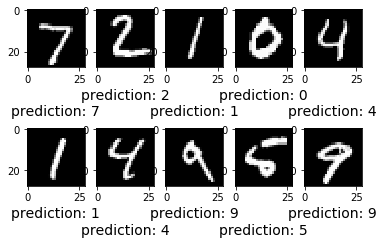

In [19]:
knn_sklearn.plot_sample_recognitions(training_lists, test_lists)


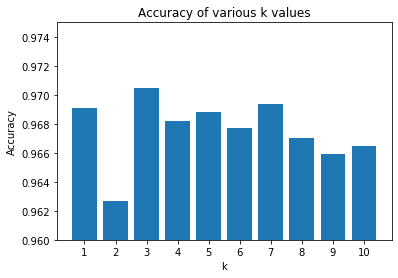

In [20]:
# runs the k_accuracy test with 10000 images between the chosen k values (k_min, k_max) > then plots the result
# plot.k_accuracy_test(training_lists, test_lists, 1, 4)  # saves the result as k_accuracy2 to avoid time wasted
plot.plot_k_accuracy(pickle_io.load_pickles("src/k_accuracy.dat"))
    

After that, the PCA variance is determined and plotted so we can find out the amount of dimensions neccessary 
to have the highest accuracy to predict the right digit.


In [ ]:

# runs the pca_variance_analysis and plots it
plot.pca_variance_analysis([csv_image.image for csv_image in test_lists])


Then, the dimensions are reduced for each image to the optimal amount. The reduced test and training images from both
lists are the saved in a different list for test and training images.

In [ ]:
reduced_images = pca.reduce_dimensions([csv_image.image for csv_image in training_lists], [csv_image.image for csv_image in test_lists], 100)
pca.plot_sample_reductions(reduced_images[2], training_lists, test_lists, reduced_images[0],  reduced_images[1], reduced_images[3], 100)


The reduced images are the again reduced??

In [ ]:
# Get reduces training and test images as tuple - reduced_images[0] is train_list, [1] is test_list without digits
reduced_images = pca.reduce_dimensions([csv_image.image for csv_image in training_lists],
                                       [csv_image.image for csv_image in test_lists], 784)
print("PCA finished successfully")

Reverses the PCA and plots the image back to its original stae

In [ ]:
pca.plot_inverse_transforms(reduced_images[2], reduced_images[1], reduced_images[3])


Plots the pca accuracy for each dimension.


In [ ]:
plot.plot_pca_accuracy(pickle_io.load_pickles("pca_accuracy.dat"))


Shows the most recognazible test digits for each digit from zero to nine calculated with the mean distance
of each training image with the same label as the digit.


In [ ]:
meta_digit.show_mean_digits(training_lists)

In [ ]:
meta_digit.show_median_digits(training_lists)

In [34]:
%load_ext autoreload
%autoreload 2
best_digits = np.asarray([csv_image.image for csv_image in meta_digit.get_best_digits(training_lists, test_lists)])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


FileNotFoundError: [Errno 2] No such file or directory: '../data/skknnproba.dat'

In [ ]:
meta_digit.show_best_digits(training_lists, test_lists, best_digits)

In [ ]:
knn_clustering.get_mispredictions(training_lists, test_lists)


If the digit was wrong predicted it is plotted to show what is wrong with the digit  

In [21]:
knn_sklearn.show_wrong_predicted(training_lists, test_lists, best_digits)    

NameError: name 'best_digits' is not defined